<font size="5">Copyright 2022 Edward Späth, Frankfurt University of Applied Sciences, FB2, Computer Science\
No liability or warranty; only for educational and non-commercial purposes\
See some basic hints for working with Jupyter notebooks in README.md</font>

<font size="6">Data Structure Priority Queue</font>

<font size="6">Data Structure for storing Keys with their respective Priorities</font>

In [1]:
class Node:
    def __init__(self, name_input, prio_input):
        self.name = name_input
        self.prio = prio_input

<font size="6">Storage for Elements of Priority Queue</font>

In [2]:
ELEMENTS = []
HEAPSIZE = 0

<font size="6">Function to reset Priority Queue</font>

In [3]:
def reset_pq():
    global ELEMENTS, HEAPSIZE
    ELEMENTS, HEAPSIZE = [], 0

<font size="6">Helper Functions for easier access to Children/Parents of a given Element in Heap</font>

In [4]:
def parent(i):
    return (i-1)//2 # '//' means division with floor function (round down)

def left(i):
    return 2*i+1

def right(i):
    return 2*i+2

<font size="6">Implementation of a Priority Queue</font>

In [5]:
def initialize(initial_elements = []):
    for name_input, prio_input in initial_elements:
        insert_key(name_input, prio_input)
        
def insert_key(name_input, prio_input):
        global ELEMENTS, HEAPSIZE
        name_already_exists = False
        for element in ELEMENTS:
            if element.name == name_input:
                name_already_exists = True
        if not name_already_exists:
            ELEMENTS.append(Node (name_input, float('inf'))) # float('inf') = positive infinity
            heap_decrease_key(HEAPSIZE, prio_input)
            HEAPSIZE += 1   
        else:
            print("\nThere is already an element named", name_input, "Please choose a different Name.")
            
def heap_decrease_key(i, prio_input):
    global ELEMENTS 
    if prio_input >= ELEMENTS[i].prio:
        print("\nERROR: New priority must be smaller than old priority")
        return       
    ELEMENTS[i].prio = prio_input   
    while i > 0 and ELEMENTS[parent(i)].prio > ELEMENTS[i].prio:
        ELEMENTS[i], ELEMENTS[parent(i)] = ELEMENTS[parent(i)], ELEMENTS[i]
        i = parent(i)
        
def extract_min():
    global ELEMENTS, HEAPSIZE
    if HEAPSIZE < 1:
        print("\nERROR: Underflow. Cannot extract from an empty Queue")
        return      
    min_element = ELEMENTS[0]
    HEAPSIZE -= 1
    ELEMENTS = ELEMENTS[1:] # Deletes first Element
    min_heapify(0)   
    print("\nElement", min_element.name, "with Priority", min_element.prio, "has been extracted")
        
def min_heapify(i):
    global ELEMENTS, HEAPSIZE
    l = left(i)
    r = right(i)   
    if l < HEAPSIZE and ELEMENTS[l].prio < ELEMENTS[i].prio:
        minimum = l
    else:
        minimum = i       
    if r < HEAPSIZE and ELEMENTS[r].prio < ELEMENTS[minimum].prio:
        minimum = r   
    if minimum != i:
        ELEMENTS[i], ELEMENTS[minimum] = ELEMENTS[minimum], ELEMENTS[i]
        min_heapify(minimum)
    
def reduce_priority(name_to_be_searched, prio_input):
    global ELEMENTS   
    key_found = False  
    for index, element in enumerate(ELEMENTS):
        if element.name == name_to_be_searched:
            key_found = True
            at_index = index
            break          
    if not key_found:      
        print("\nERROR: Element whose Priority you want to decrease does not exist")
        return     
    if ELEMENTS[at_index].prio <= prio_input: 
        print("\nERROR: New Priority of", ELEMENTS[at_index].name, 
              "is not lower than old Priority! Priority may only ever decrease. Priority stays unchanged")
        return
    heap_decrease_key(at_index, prio_input)
    
def print_pq(show_name=True, show_prio=True):
    if HEAPSIZE < 1:
        print("\nThe current Priority Queue is empty! Nothing to Print")
        return 
    if not show_name and not show_prio:
        print("\nYou have to atleast print the Names or the Priorities")
    printarray = [] 
    for element in ELEMENTS:
        if show_name and show_prio:
            printarray.append((element.name,element.prio))
        elif show_name:
            printarray.append(element.name)
        else:
            printarray.append(element.prio)
    print("\nThe current Priority Queue of size", HEAPSIZE, "is: --> Printing Names:",
           show_name, "- Printing Priorities:", show_prio)  
    print(printarray)

<font size="6">Example with Explanations on how to use Functions</font>

In [6]:
# This list saves the initial Elements you want to Enqueue. The Name of the Key is written in Ticks ('') on the left side of each pair
# The corresponding Priority is written on the right side of each pair
# This example initializes the Priority Queue with a Key named 'A' with Priority 4, another Key named 'B' with Priority 2, etc
# Note that this is a MIN-PRIORITY-QUEUE. The lower the number representing Priority, the higher the Priority (lower is better)

# If you dont want to initialize anything leave the array empty --> "initial_elements = []"
# Alternatively remove initial_elements from the initialize-function's parameters --> "initialize ()"

initial_elements = [('A', 4), ('B', 2), ('C', 6), ('D', 1)]

initialize(initial_elements)

# Prints the current contents of the Priority Queue aswell as size
# The Boolean Values allow you to select what you want to be printed.
# In the example below both Name and Priority of each Element will be printed
# Calling print_pq without parameters is the same as both Booleans being True
print_pq(show_name = True, show_prio = True)

# If you only want the name to be printed, have "show_name = True" and "show_prio = False":
# And vice versa
print_pq(show_name = True, show_prio = False)

# Extracts the Element with the lowest Priority and Prints what its Data was
extract_min()

print_pq(show_name = True, show_prio = True)

# Same Idea as with intial_elements but only one Element at a time
insert_key('F', 3)

print_pq (show_name = True, show_prio = True)

# Instead of creating a new unique name, give the name of an existing Element whose Priority you want to change (give new Priority as right value)
reduce_priority('F', 2)

print_pq(show_name = False, show_prio = True)

reset_pq() # Resets Contents of Priority Queue (ignore)


The current Priority Queue of size 4 is: --> Printing Names: True - Printing Priorities: True
[('D', 1), ('B', 2), ('C', 6), ('A', 4)]

The current Priority Queue of size 4 is: --> Printing Names: True - Printing Priorities: False
['D', 'B', 'C', 'A']

Element D with Priority 1 has been extracted

The current Priority Queue of size 3 is: --> Printing Names: True - Printing Priorities: True
[('B', 2), ('C', 6), ('A', 4)]

The current Priority Queue of size 4 is: --> Printing Names: True - Printing Priorities: True
[('B', 2), ('F', 3), ('A', 4), ('C', 6)]

The current Priority Queue of size 4 is: --> Printing Names: False - Printing Priorities: True
[2, 2, 4, 6]


<font size="6">Your Tests go here...</font>

In [7]:
initial_elements = [('A', 4), ('B', 2), ('C', 6), ('D', 1)]

initialize(initial_elements)

print_pq(show_name = True, show_prio = True)

reduce_priority('F', 2)

print_pq(show_name = True, show_prio = True)

reset_pq() # Resets Contents of Priority Queue (ignore)


The current Priority Queue of size 4 is: --> Printing Names: True - Printing Priorities: True
[('D', 1), ('B', 2), ('C', 6), ('A', 4)]

ERROR: Element whose Priority you want to decrease does not exist

The current Priority Queue of size 4 is: --> Printing Names: True - Printing Priorities: True
[('D', 1), ('B', 2), ('C', 6), ('A', 4)]


<font size="6">Create your Priority Queue. It will be visualized as a Min-Heap at the very bottom</font>

In [8]:
initial_elements = [('A', 4), ('B', 2), ('C', 6), ('D', 1)]

initialize(initial_elements)

insert_key('F', 3)

reduce_priority('A', 3)

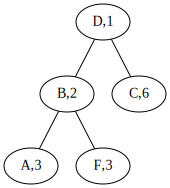

In [9]:
from graphviz import Graph  

dot = Graph()
for index in range(len(ELEMENTS)):       
    if left(index) < HEAPSIZE:    
        start = ELEMENTS[index].name + "," + str(ELEMENTS[index].prio) # Concatinating the Name of each Element together with its Priority into a single string
        destination = ELEMENTS[left(index)].name + "," + str(ELEMENTS[left(index)].prio)
        dot.edge(start,destination)
    if right(index) < HEAPSIZE:
        start = ELEMENTS[index].name + "," + str(ELEMENTS[index].prio)
        destination = ELEMENTS[right(index)].name + "," + str(ELEMENTS[right(index)].prio)
        dot.edge(start,destination)
dot